# Import

In [1]:
import numpy as np
import scanpy as sc
from matplotlib import pyplot as plt
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import warnings
warnings.filterwarnings("ignore")

# Train CASTLE, evaluation and visualization

In [2]:
import castle
data_name = 'Splenocyte'
adata = castle.main.CASTLE('./example/%s.h5ad'%data_name, outdir='./example/%s'%data_name)

AttributeError: module 'castle' has no attribute 'main'

# Feature spectrum

In [3]:
adata = castle.feature_spectrum.cal_feat_spe(adata)
print(adata)

Feature spectrum shape:  (12, 400)
AnnData object with n_obs × n_vars = 3166 × 50
    obs: 'cell_type', 'batch', 'test_type', 'n_genes', 'Dlouvain', 'Clouvain', 'Dleiden', 'Cleiden', 'kmeans', 'Ckmeans', 'hc', 'Chc'
    var: 'peak', 'n_cells'
    uns: 'neighbors', 'umap', 'louvain', 'leiden', 'cell_type_colors', 'feature_spectrum'
    obsm: 'latent', 'feature_index', 'X_umap'
    obsp: 'distances', 'connectivities'


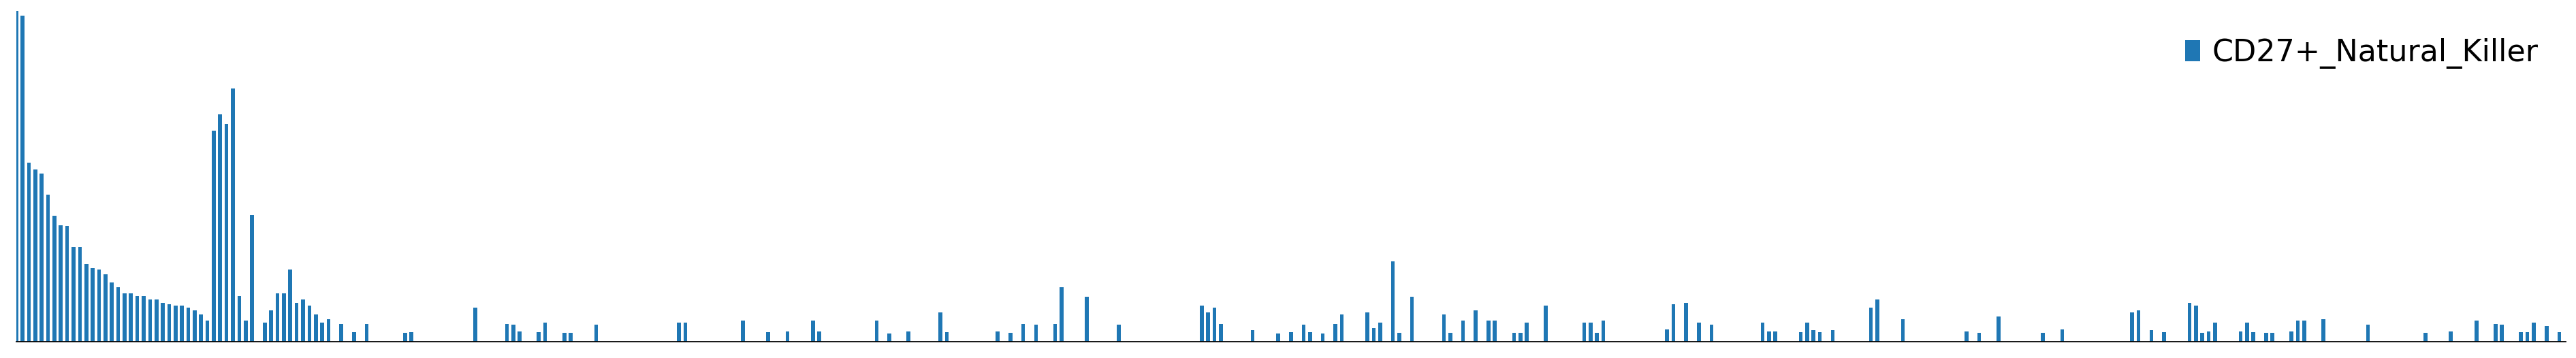

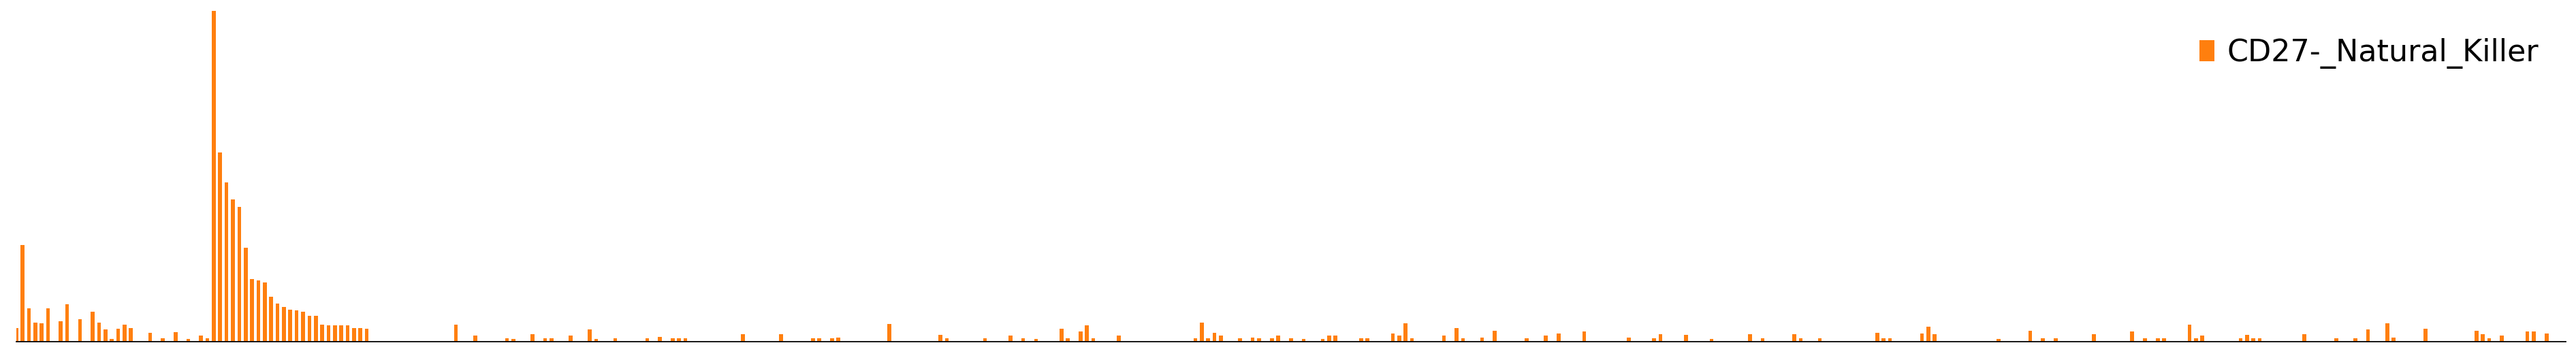

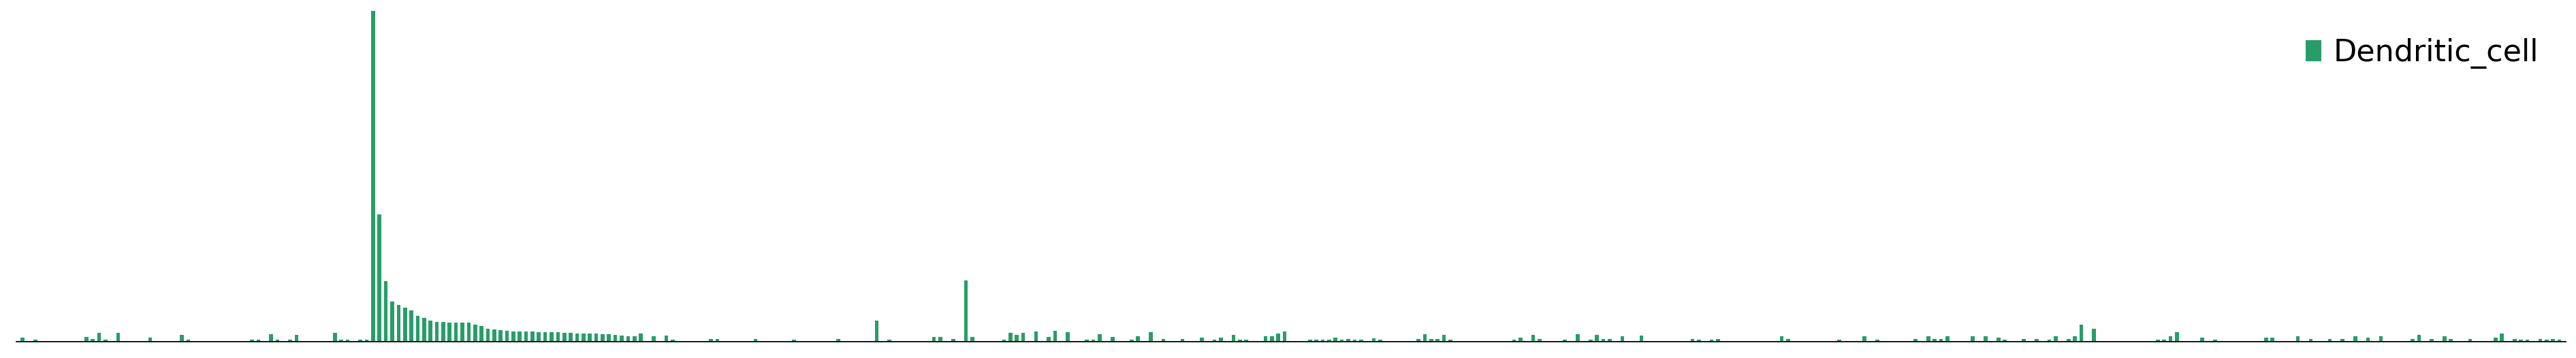

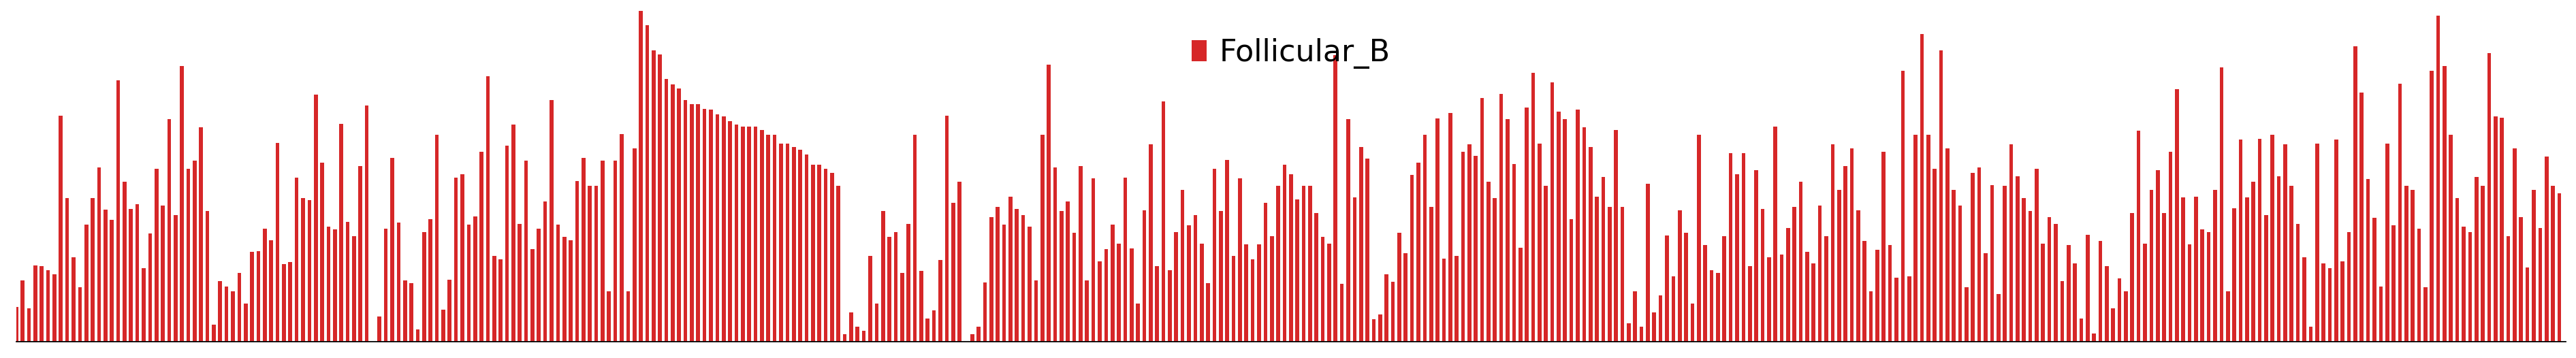

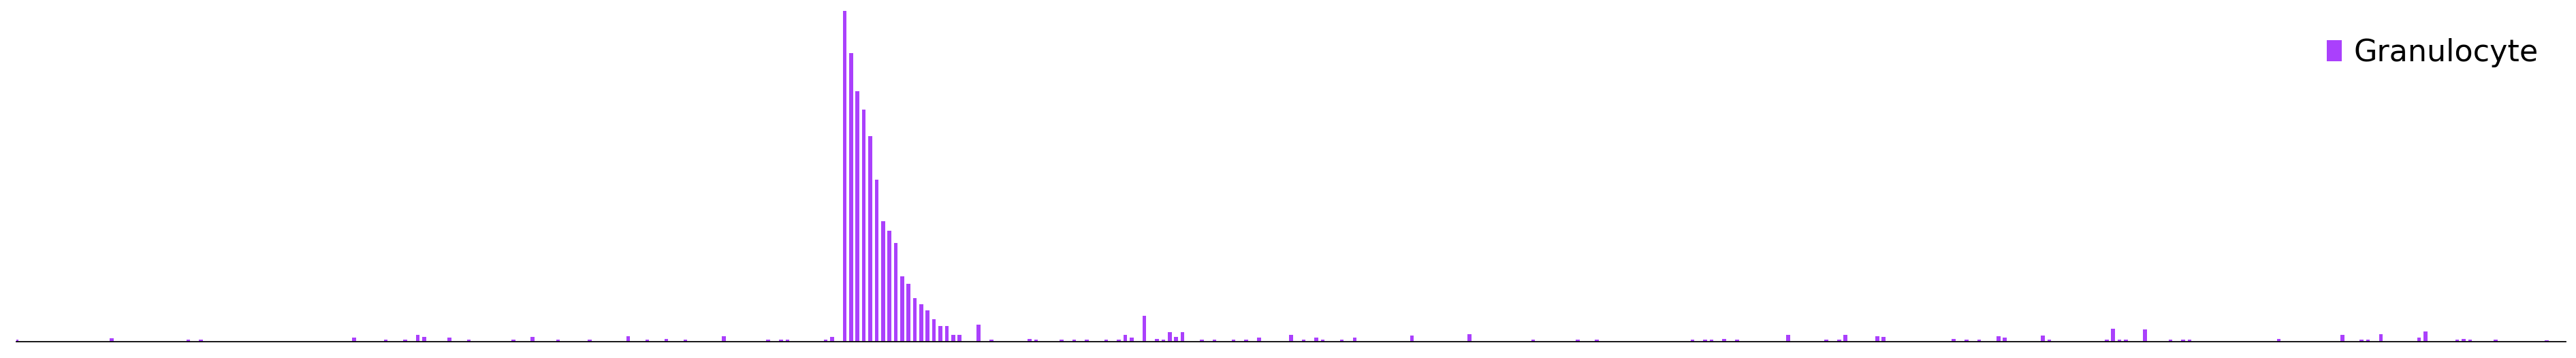

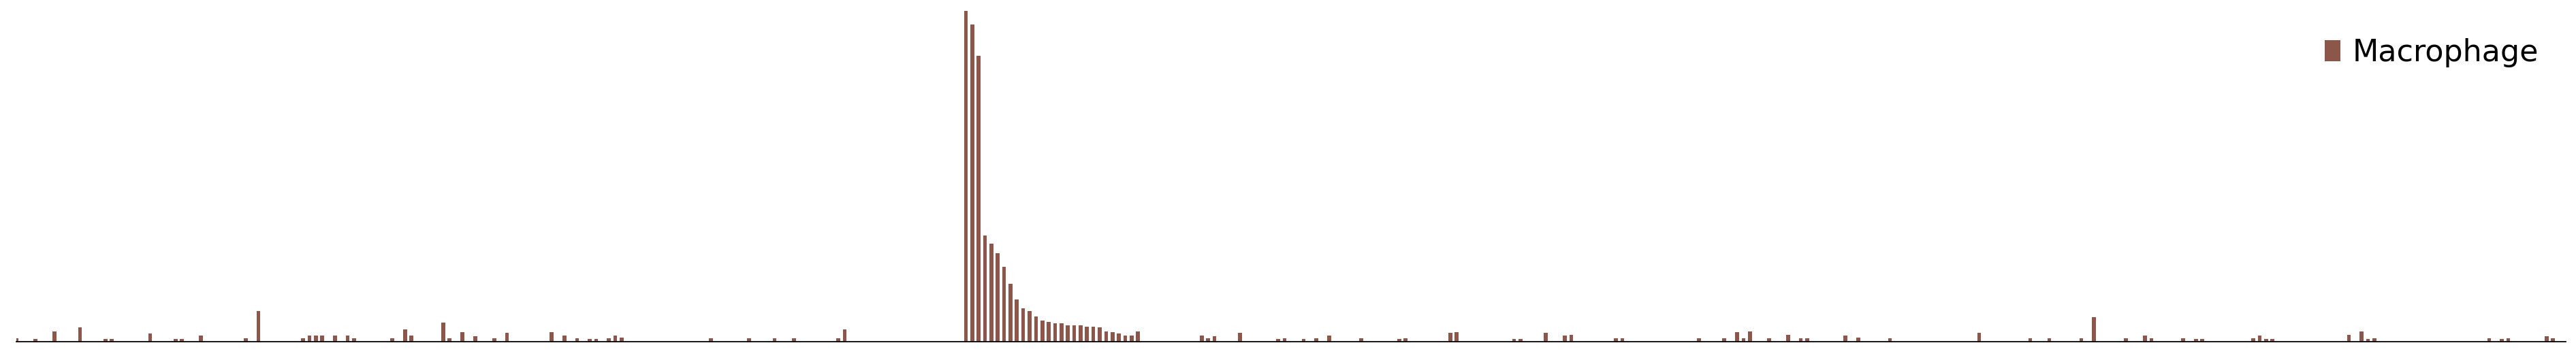

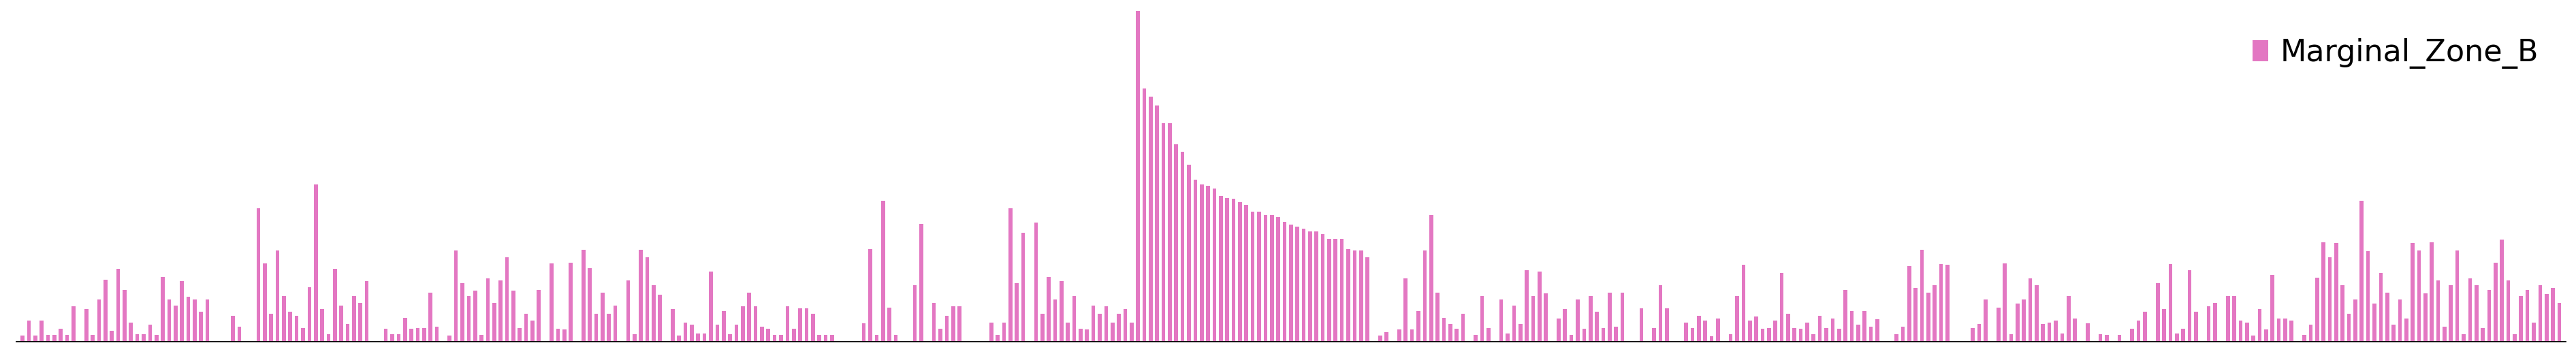

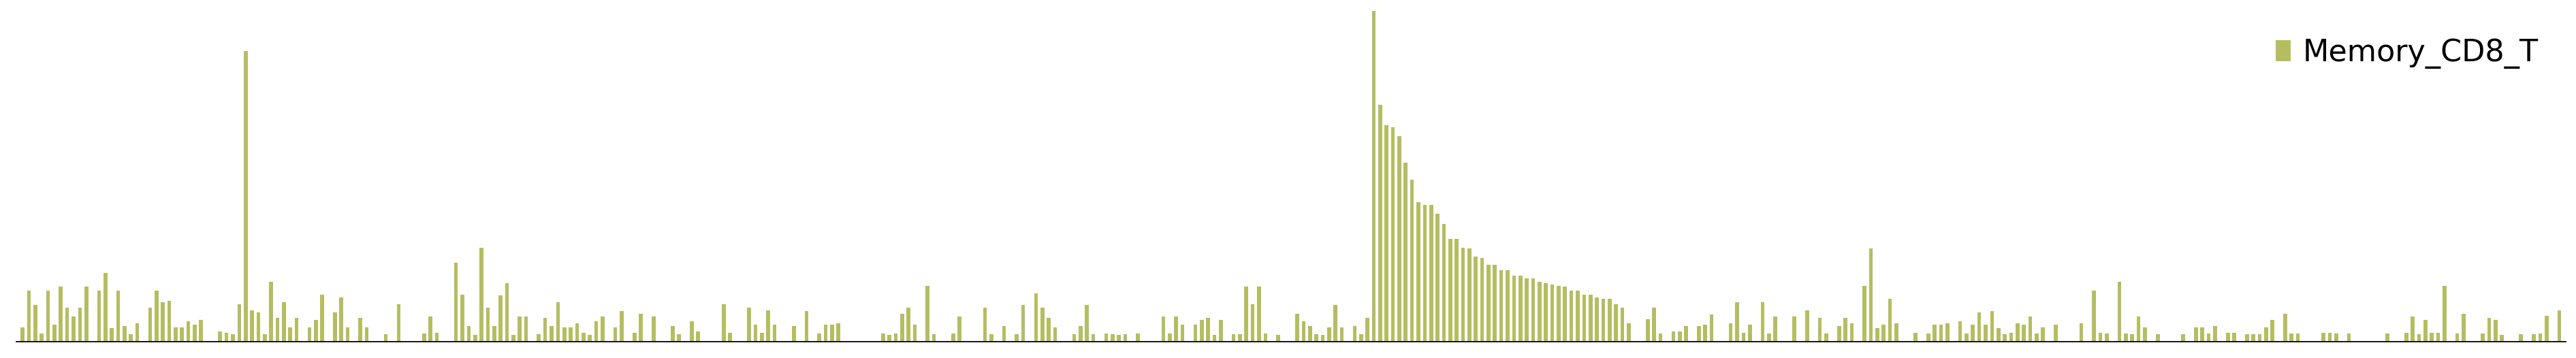

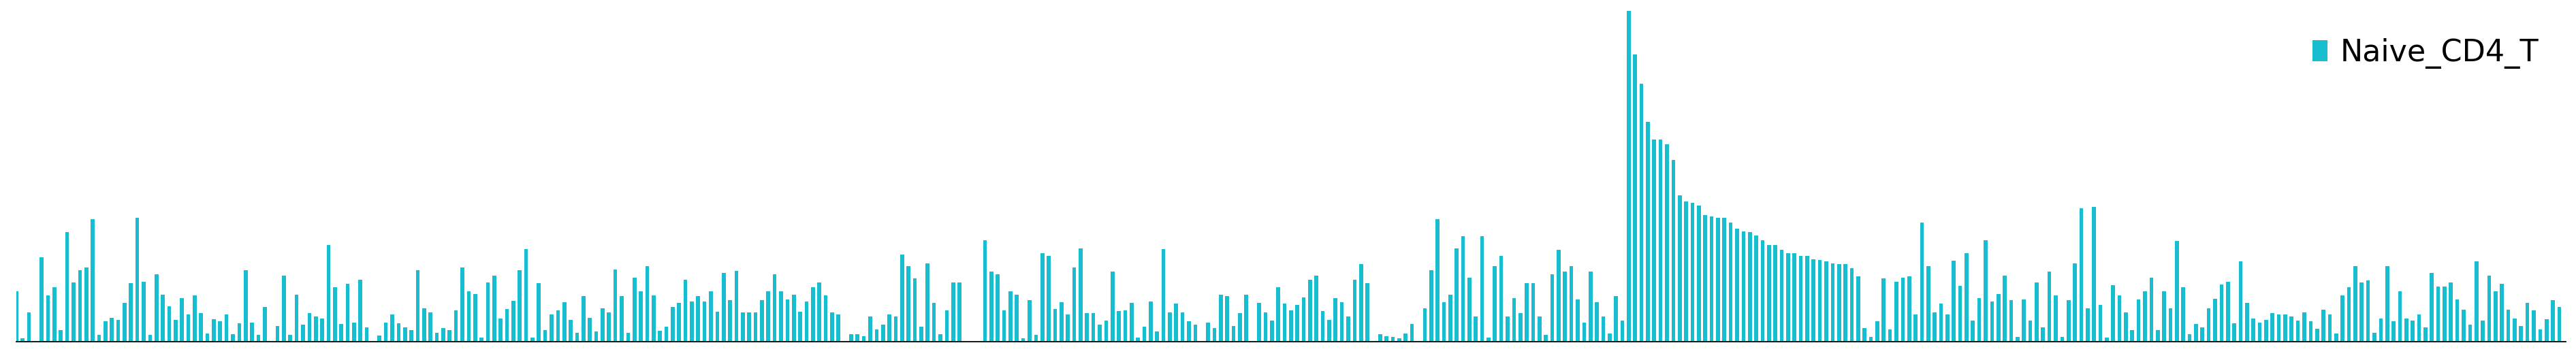

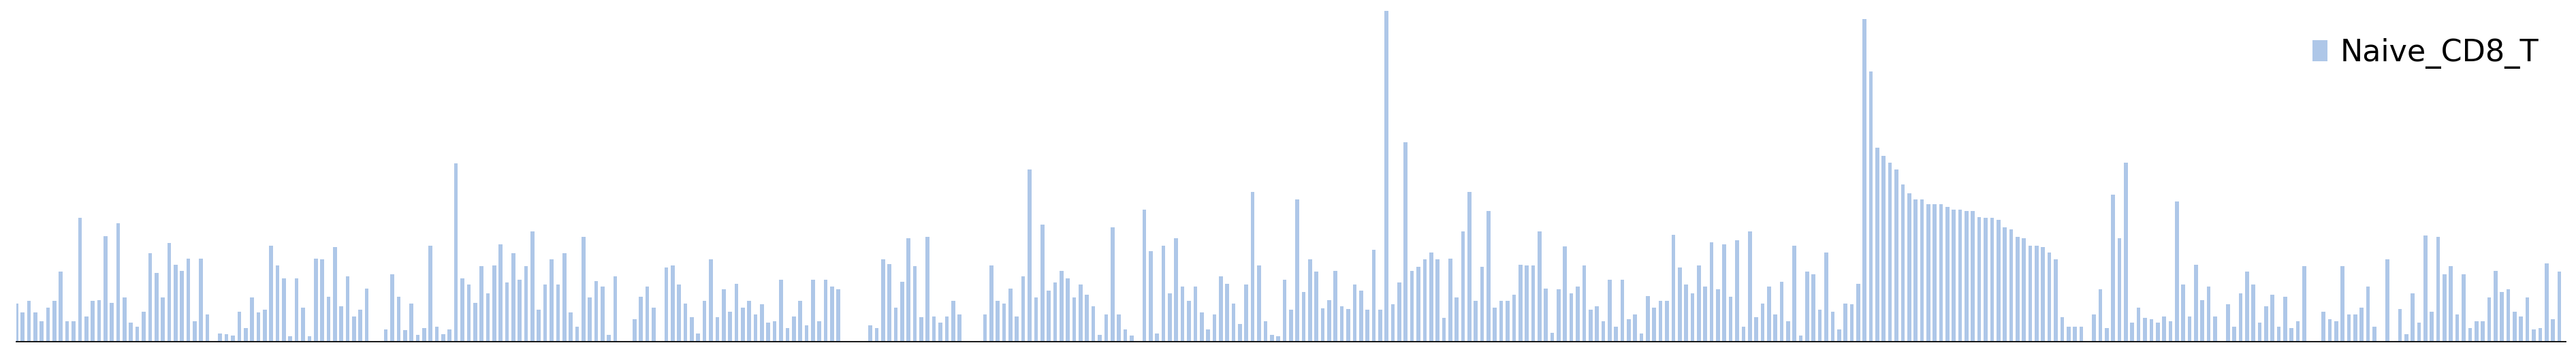

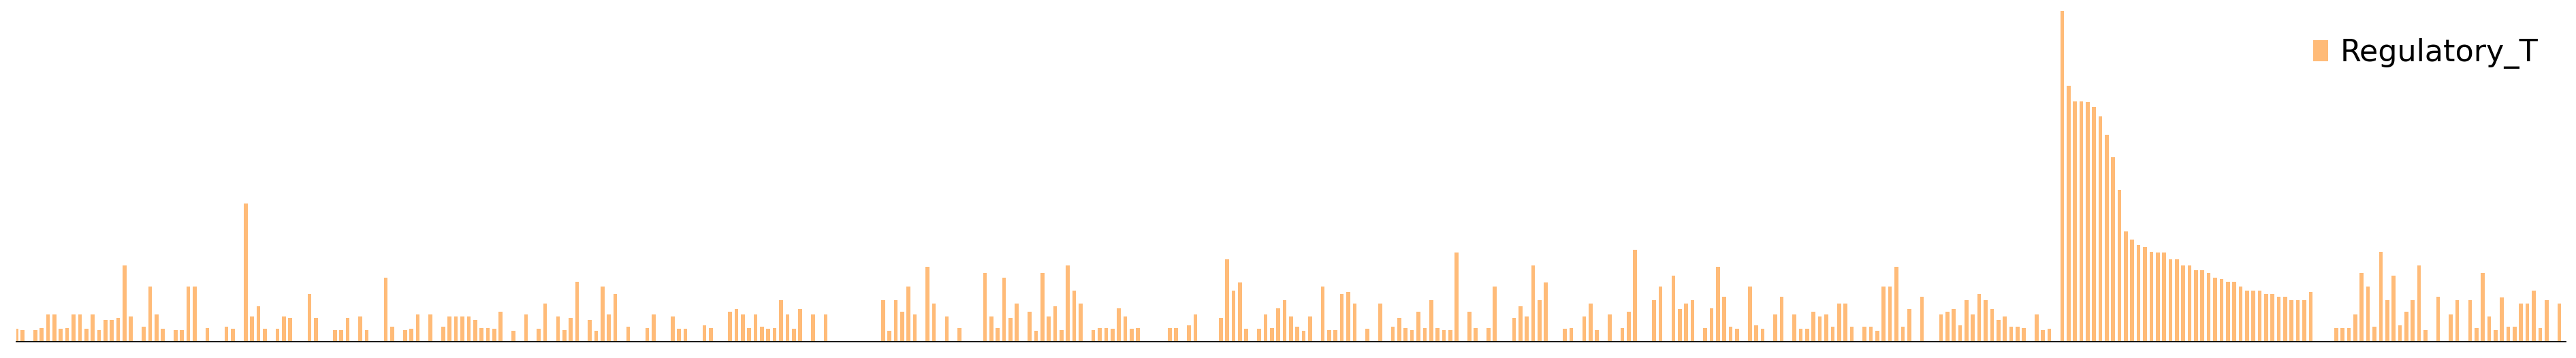

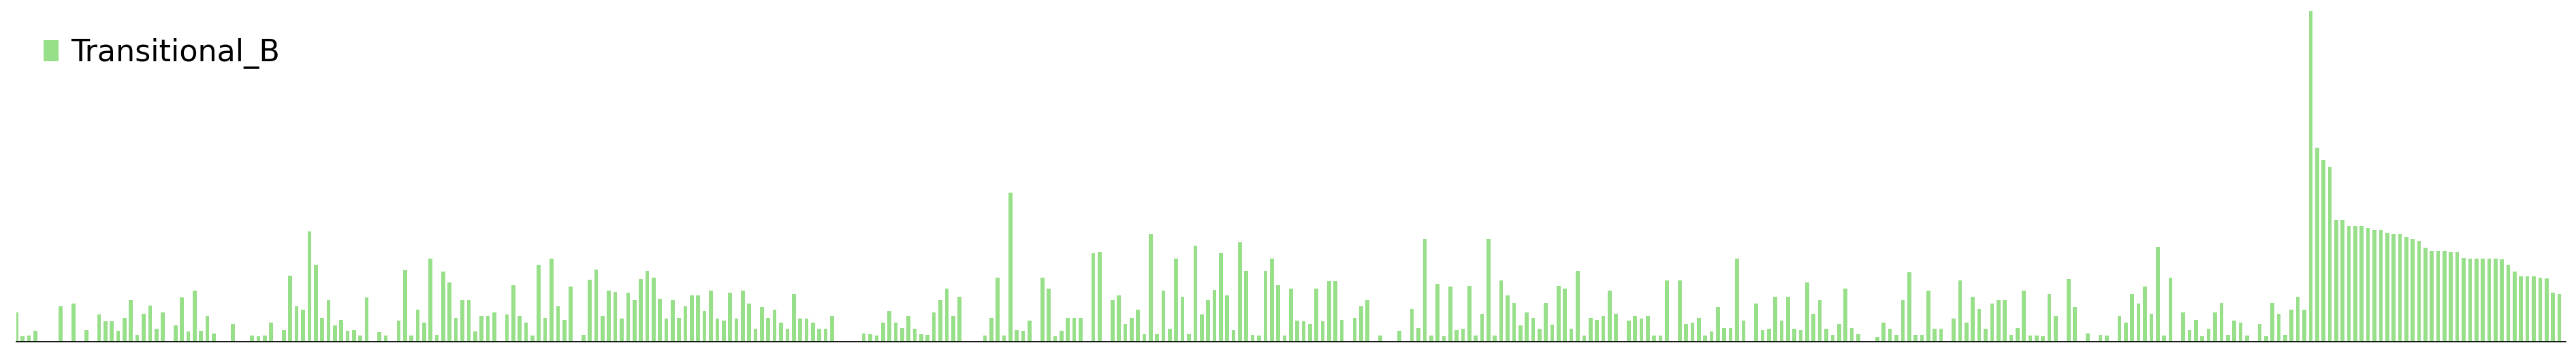

In [4]:
feature_spectrum = adata.uns['feature_spectrum']
n_index = int(np.max(adata.obsm['feature_index'])+1)
colors = ['#1f77b4','#ff7f0e','#279e68','#d62728','#aa40fc','#8c564b','#e377c2','#b5bd61','#17becf','#aec7e8',
          '#ffbb78','#98df8a','#ff9896','#c5b0d5','#c49c94','#f7b6d2','#dbdb8d','#9edae5','#ad494a','#8c6d31']
for i in np.unique(adata.obs['cell_type'].cat.codes):
    cell_type = adata.obs['cell_type'].cat.categories[i]
    ylim = np.max(feature_spectrum[i])
    plt.figure(figsize=(30, 4))
    plt.bar(np.arange(n_index), feature_spectrum[i], width=0.6, color=colors[i], label=cell_type)
    plt.xlim([0, n_index]);plt.ylim([0, ylim]);plt.xticks([]);plt.yticks([]);plt.legend(fontsize=20, frameon=False)
    ax = plt.gca();ax.spines['left'].set_color('none');ax.spines['right'].set_color('none');ax.spines['top'].set_color('none')
    plt.show()